### Importing Data and Packages

In [2]:
# imports
import numpy as np
import pandas as pd 
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing fake news data 
fake_data = pd.read_csv("./Fake.csv")
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
# importig real news data
true_data = pd.read_csv("./True.csv")
true_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
# labeling real news (0) and fake news (1) 
fake_data["Fake"] = 1 
true_data["Fake"] = 0 

# merging the two data sets
data = pd.concat([true_data, fake_data])

# resetting index of the data frame
data.reset_index(inplace=True)

# removing index column of the frame
data = data[list(data.columns)[1:]]

# displaying data 
data

,title,text,subject,date,Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


### Sentiment Analysis on the Titles / Body Text

In [5]:
# importing pakcage for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

# initializing features to zero 
data[["title sa neg", "title sa pos", "title sa neu", "title sa comp"]] = 0 

# performing title sentiment analysis for each instance
for i in range(len(data)): 
    sa = SentimentIntensityAnalyzer().polarity_scores(data["title"].iloc[i])
    data["title sa neg"].iloc[i] = sa["neg"]
    data["title sa pos"].iloc[i] = sa["pos"]
    data["title sa neu"].iloc[i] = sa["neu"]
    data["title sa comp"].iloc[i] = sa["compound"]
    
# displaying data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449
...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000


In [43]:
# initializing features to zero 
data[["text sa neg", "text sa pos", "text sa neu", "text sa comp"]] = 0 

# performing text sentiment analysis for each instance
for i in range(len(data)): 
    sa = SentimentIntensityAnalyzer().polarity_scores(data["text"].iloc[i])
    data["text sa neg"].iloc[i] = sa["neg"]
    data["text sa pos"].iloc[i] = sa["pos"]
    data["text sa neu"].iloc[i] = sa["neu"]
    data["text sa comp"].iloc[i] = sa["compound"]
    
# displaying data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,text sa pos,text sa neu,text sa comp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,0.089,0.862,0.9857
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,0.092,0.824,-0.0547
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,0.044,0.906,-0.6808
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,0.059,0.874,-0.2201
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,0.061,0.893,0.5896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,0.111,0.787,0.7675
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,0.093,0.853,0.9429
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,0.103,0.767,-0.9994
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,0.085,0.834,0.4589


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 2.1800e+02, 4.7910e+03, 1.3147e+04, 3.2550e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

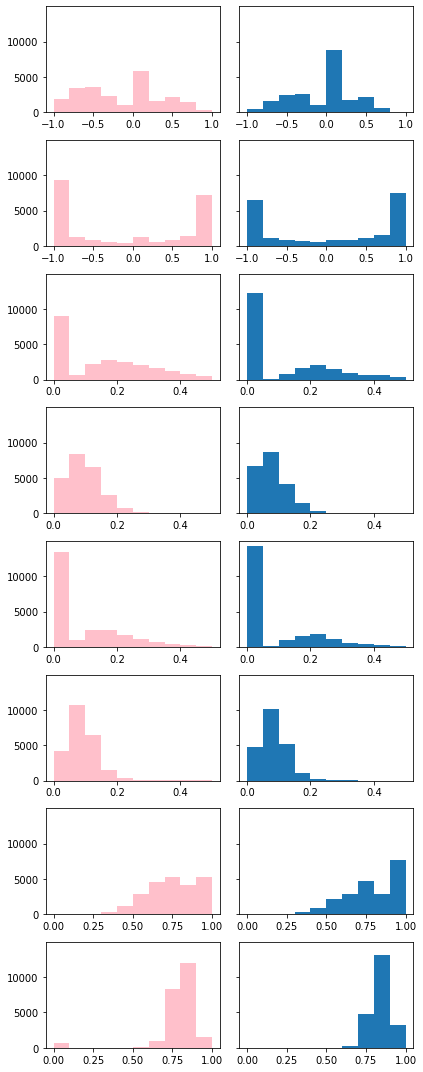

In [131]:
import matplotlib.pyplot as plt

# comp data
fake_sa_text = data[data.Fake == 1]["text sa comp"].to_numpy()
real_sa_text = data[data.Fake == 0]["text sa comp"].to_numpy()

fake_sa_title = data[data.Fake == 1]["title sa comp"].to_numpy()
real_sa_title = data[data.Fake == 0]["title sa comp"].to_numpy()

# neg data
fake_sa_text_neg = data[data.Fake == 1]["text sa neg"].to_numpy()
real_sa_text_neg = data[data.Fake == 0]["text sa neg"].to_numpy()

fake_sa_title_neg = data[data.Fake == 1]["title sa neg"].to_numpy()
real_sa_title_neg = data[data.Fake == 0]["title sa neg"].to_numpy()

# pos data
fake_sa_text_pos = data[data.Fake == 1]["text sa pos"].to_numpy()
real_sa_text_pos = data[data.Fake == 0]["text sa pos"].to_numpy()

fake_sa_title_pos = data[data.Fake == 1]["title sa pos"].to_numpy()
real_sa_title_pos = data[data.Fake == 0]["title sa pos"].to_numpy()

# neu data
fake_sa_text_neu = data[data.Fake == 1]["text sa neu"].to_numpy()
real_sa_text_neu = data[data.Fake == 0]["text sa neu"].to_numpy()

fake_sa_title_neu = data[data.Fake == 1]["title sa neu"].to_numpy()
real_sa_title_neu = data[data.Fake == 0]["title sa neu"].to_numpy()


# adjusting display size
plt.rcParams["figure.figsize"] = (6,15)

# setting figure parameters
fig, axs = plt.subplots(8, 2, sharey=True, tight_layout=True)

# compopund Sentiment Analysis 
axs[0, 0].hist(fake_sa_title, range=(-1,1), color = "pink")
axs[0, 1].hist(real_sa_title, range=(-1,1))
axs[1, 0].hist(fake_sa_text, range=(-1,1), color = "pink")
axs[1, 1].hist(real_sa_text, range=(-1,1))

# negative Sentiment Analysis
axs[2, 0].hist(fake_sa_title_neg, range=(0,0.5), color = "pink")
axs[2, 1].hist(real_sa_title_neg, range=(0,0.5))
axs[3, 0].hist(fake_sa_text_neg, range=(0,0.5), color = "pink")
axs[3, 1].hist(real_sa_text_neg, range=(0,0.5))

# positive Sentiment Analysis
axs[4, 0].hist(fake_sa_title_pos, range=(0,0.5), color = "pink")
axs[4, 1].hist(real_sa_title_pos, range=(0,0.5))
axs[5, 0].hist(fake_sa_text_pos, range=(0,0.5), color = "pink")
axs[5, 1].hist(real_sa_text_pos, range=(0,0.5))

# neutral Sentiment Analysis
axs[6, 0].hist(fake_sa_title_neu, range=(0,1), color = "pink")
axs[6, 1].hist(real_sa_title_neu, range=(0,1))
axs[7, 0].hist(fake_sa_text_neu, range=(0,1), color = "pink")
axs[7, 1].hist(real_sa_text_neu, range=(0,1))


### One - Hot Encoding Subject Feature

In [22]:
# importing one-hot encoding package 
from sklearn.preprocessing import OneHotEncoder

# importing the data (to ensure data integrity)
data = pd.read_csv("./v1.csv")

# list of unique subjects
subjects = list(data.subject.unique())

# fitting the encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(subjects).reshape(-1, 1))

# transforming the encoding to a full array
ohe_subject = np.array(enc.transform(data["subject"].to_numpy().reshape(-1,1)).todense())

# inserting the one-hot encoding into the dataframe 
subject_list = list(enc.categories_[0])
data[subject_list] = ohe_subject

# removing unneeded index column
data = data[list(data.columns)[1:]]

# displaying data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,text sa neu,text sa comp,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.862,0.9857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.824,-0.0547,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.906,-0.6808,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.874,-0.2201,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.893,0.5896,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.787,0.7675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.853,0.9429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.767,-0.9994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.834,0.4589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# backing up data into a csv file 
data.to_csv("v2.csv")

#### Removing Punctuation

In [40]:
# importing data to ensure data entegrity
data = pd.read_csv("./v2.csv")

# importing string class for punctuation 
import string

# adding column for processed title and for processed text
data[["processed title", "processed text"]] = ""

# removing punctuation 
titles, texts = data["title"].to_numpy(), data["text"].to_numpy()
processed_titles, processed_text = [], []
for i in range(len(titles)): 
    processed_titles.append("".join([j for j in titles[i] if j not in string.punctuation]))
    processed_text.append("".join([j for j in texts[i] if j not in string.punctuation]))

# adding processed data into the data frame 
data["processed title"], data["processed text"] = processed_titles, processed_text

# displaying data
data = data[list(data.columns)[1:]]
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,processed title,processed text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,As US budget fight looms Republicans flip thei...,WASHINGTON Reuters The head of a conservative...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,US military to accept transgender recruits on ...,WASHINGTON Reuters Transgender people will be...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Senior US Republican senator Let Mr Mueller do...,WASHINGTON Reuters The special counsel invest...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,FBI Russia probe helped by Australian diplomat...,WASHINGTON Reuters Trump campaign adviser Geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Trump wants Postal Service to charge much more...,SEATTLEWASHINGTON Reuters President Donald Tr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,McPain John McCain Furious That Iran Treated U...,21st Century Wire says As 21WIRE reported earl...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,JUSTICE Yahoo Settles Email Privacy Classactio...,21st Century Wire says It s a familiar theme W...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Sunnistan US and Allied ‘Safe Zone’ Plan to Ta...,Patrick Henningsen 21st Century WireRemember ...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,How to Blow 700 Million Al Jazeera America Fin...,21st Century Wire says Al Jazeera America will...


#### Converting to Lower Case

In [41]:
# converting dataframe columns to numpy arrrays 
titles = data["processed title"].to_numpy()
texts = data["processed text"].to_numpy()

# iterating through array and changing all to lower case
for j in range(len(titles)): 
    titles[j] = titles[j].lower()
    texts[j] = texts[j].lower()
    
# setting the columns back to processed data
data["processed title"], data["processed text"] = titles, texts
        
# display data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,processed title,processed text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,us military to accept transgender recruits on ...,washington reuters transgender people will be...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,mcpain john mccain furious that iran treated u...,21st century wire says as 21wire reported earl...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,justice yahoo settles email privacy classactio...,21st century wire says it s a familiar theme w...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,sunnistan us and allied ‘safe zone’ plan to ta...,patrick henningsen 21st century wireremember ...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,how to blow 700 million al jazeera america fin...,21st century wire says al jazeera america will...


#### Tokenization of Titles and Text 

In [42]:
# converting dataframe columns to numpy arrrays 
titles = data["processed title"].to_numpy()
texts = data["processed text"].to_numpy()

# iterating through array and tokenizing
for j in range(len(titles)): 
    titles[j] = titles[j].split()
    texts[j] =  texts[j].split()
    
# setting the columns back to processed data
data["processed title"], data["processed text"] = titles, texts
        
# display data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,processed title,processed text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, the, head, of, a, conser..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, wil..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[senior, us, republican, senator, let, mr, mue...","[washington, reuters, the, special, counsel, i..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[mcpain, john, mccain, furious, that, iran, tr...","[21st, century, wire, says, as, 21wire, report..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[justice, yahoo, settles, email, privacy, clas...","[21st, century, wire, says, it, s, a, familiar..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[sunnistan, us, and, allied, ‘safe, zone’, pla...","[patrick, henningsen, 21st, century, wireremem..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[how, to, blow, 700, million, al, jazeera, ame...","[21st, century, wire, says, al, jazeera, ameri..."


#### Removing Stop Words From Title and Text

In [43]:
# importing nltk package 
import nltk

# getting list of stop words present in the nltk library
stopwords = nltk.corpus.stopwords.words('english')

# converting dataframe columns to numpy arrrays 
titles = data["processed title"].to_numpy()
texts = data["processed text"].to_numpy()

# iterating through array and tokenizing
for j in range(len(titles)): 
    titles[j] = [word for word in titles[j] if word not in stopwords]
    texts[j] = [word for word in texts[j] if word not in stopwords]
    
# setting the columns back to processed data
data["processed title"], data["processed text"] = titles, texts
        
# display data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,processed title,processed text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[us, budget, fight, looms, republicans, flip, ...","[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[us, military, accept, transgender, recruits, ...","[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[trump, wants, postal, service, charge, much, ...","[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[mcpain, john, mccain, furious, iran, treated,...","[21st, century, wire, says, 21wire, reported, ..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[justice, yahoo, settles, email, privacy, clas...","[21st, century, wire, says, familiar, theme, w..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[sunnistan, us, allied, ‘safe, zone’, plan, ta...","[patrick, henningsen, 21st, century, wireremem..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[blow, 700, million, al, jazeera, america, fin...","[21st, century, wire, says, al, jazeera, ameri..."


#### Lemmatization of Title and Text

In [44]:
# importing package for Lemmatization 
from nltk.stem import WordNetLemmatizer

# Lemmatization object
wordnet_lemmatizer = WordNetLemmatizer()

# convering dataframe columns to numpy arrrays 
titles = data["processed title"].to_numpy()
texts = data["processed text"].to_numpy()

# iterating through array and stemming
for j in range(len(titles)): 
    titles[j] = [wordnet_lemmatizer.lemmatize(word) for word in titles[j]]
    texts[j] = [wordnet_lemmatizer.lemmatize(word) for word in texts[j]]
    
# setting the columns back to processed data
data["processed title"], data["processed text"] = titles, texts
        
# display data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,processed title,processed text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[u, budget, fight, loom, republican, flip, fis...","[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[u, military, accept, transgender, recruit, mo...","[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[senior, u, republican, senator, let, mr, muel...","[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[trump, want, postal, service, charge, much, a...","[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[mcpain, john, mccain, furious, iran, treated,...","[21st, century, wire, say, 21wire, reported, e..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[justice, yahoo, settle, email, privacy, class...","[21st, century, wire, say, familiar, theme, wh..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[sunnistan, u, allied, ‘safe, zone’, plan, tak...","[patrick, henningsen, 21st, century, wireremem..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[blow, 700, million, al, jazeera, america, fin...","[21st, century, wire, say, al, jazeera, americ..."


#### Calculating the Term Frequency / Inverse Document Frequency 

In [45]:
# importing package for tf/idf vectorizaiton
from sklearn.feature_extraction.text import TfidfVectorizer

# defining title corpus 
title_corpus = data["title"].to_numpy()
  
# defining text corpus 
text_corpus = data["text"].to_numpy()

# vectorizer objects
vec_title = TfidfVectorizer(stop_words=stopwords, max_features=2000)
vec_text = TfidfVectorizer(stop_words=stopwords, max_features=2000)

# fitting the titles to a vector
title_matrix = vec_title.fit_transform(title_corpus)
title_feature_names = list(vec_title.get_feature_names_out())

# fitting the text to a vector
text_matrix = vec_text.fit_transform(text_corpus)
text_feature_names = list(vec_text.get_feature_names_out())

# modifying feature names (to distinguish between title and text)
for i in range(len(title_feature_names)):
    title_feature_names[i] = "title: " + title_feature_names[i]
for i in range(len(text_feature_names)):
    text_feature_names[i] = "text: " + text_feature_names[i]

# adding all features to the dataframe
data[title_feature_names] = title_matrix.todense()
data[text_feature_names] = text_matrix.todense()

# displaying data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,...,text: years,text: yemen,text: yes,text: yesterday,text: yet,text: york,text: young,text: youtube,text: zero,text: zone
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,...,0.071393,0.000000,0.000000,0.00000,0.031526,0.000000,0.037904,0.0,0.000000,0.000000
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.073214,0.000000,0.0,0.000000,0.000000
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.144312,0.000000,0.0,0.000000,0.000000
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,...,0.000000,0.000000,0.000000,0.05445,0.000000,0.035280,0.000000,0.0,0.000000,0.000000
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,...,0.035747,0.012725,0.000000,0.00000,0.007893,0.015228,0.000000,0.0,0.012207,0.157705
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [48]:
# getting the top 20 highest weighted terms for title

# creating a dataframe for title features
title_feature_weights = pd.DataFrame()

# getting a list of feature importance values
title_f_weights = list(vec_title.idf_)

# list of feature names 
title_f_names = list(vec_title.get_feature_names())

# adding to dataframe 
title_feature_weights["feature"] = title_f_names
title_feature_weights["weight"] = title_f_weights

# sorting features by feature weight
title_feature_weights = title_feature_weights.sort_values(by="weight", ascending=False)

# top 20 highest weighted features
title_feature_weights.iloc[:20]


,feature,weight
1629,side,8.101253
983,known,8.048609
1027,lee,8.023291
357,clean,8.023291
1882,vacation,8.023291
176,bar,8.023291
1279,page,8.023291
76,airlines,7.998599
1612,sharpton,7.998599
1859,tx,7.998599


In [49]:
# getting the top 20 highest weighted terms for title

# creating a dataframe for title features
text_feature_weights = pd.DataFrame()

# getting a list of feature importance values
text_f_weights = list(vec_text.idf_)

# list of feature names 
text_f_names = list(vec_text.get_feature_names())

# adding to dataframe 
text_feature_weights["feature"] = text_f_names
text_feature_weights["weight"] = text_f_weights

# sorting features by feature weight
text_feature_weights = text_feature_weights.sort_values(by="weight", ascending=False)

# top 20 highest weighted features
text_feature_weights.iloc[:20]


,feature,weight
1427,quot,10.613559
958,js,6.606225
809,hariri,6.428967
708,flint,6.355585
1775,taiwan,6.031998
825,hezbollah,5.978830
487,cuban,5.910052
616,epa,5.889125
1646,shooter,5.886171
357,christie,5.868626


In [54]:
# Is there any overlap between the top 20 highest weighted terms in title and text? 
[term for term in title_feature_weights["feature"] if term in text_feature_weights["feature"]]

[]

In [56]:
# How many terms are shared in total between the title and text features? 
len([term for term in vec_title.get_feature_names() if term in vec_text.get_feature_names()])

1376

### Preparing Data for Training Models

In [29]:
# defining list of features
features = list(data.columns)

# removing "date"
features.remove("date")

# removing anything to do with subject of articles
# this is because True and False articles all have different subjects
features.remove("subject")
features.remove("politicsNews")
features.remove("worldnews")
features.remove("News")
features.remove("politics")
features.remove("Government News")
features.remove("left-news")
features.remove("US_News")
features.remove("Middle-east")

# removing processed text and titles
features.remove("processed text")
features.remove("processed title")

# removing response variable from feature list 
features.remove("Fake")

print(features)

['title', 'text', 'title sa neg', 'title sa pos', 'title sa neu', 'title sa comp', 'text sa neg', 'text sa pos', 'text sa neu', 'text sa comp', 'title: 000', 'title: 10', 'title: 100', 'title: 11', 'title: 12', 'title: 13', 'title: 14', 'title: 15', 'title: 16', 'title: 17', 'title: 18', 'title: 19', 'title: 20', 'title: 2015', 'title: 2016', 'title: 2017', 'title: 2018', 'title: 2020', 'title: 21', 'title: 22', 'title: 24', 'title: 25', 'title: 30', 'title: 50', 'title: 60', 'title: abc', 'title: abe', 'title: abortion', 'title: absolutely', 'title: abuse', 'title: accept', 'title: access', 'title: accidentally', 'title: account', 'title: accused', 'title: accuses', 'title: across', 'title: act', 'title: acting', 'title: action', 'title: actions', 'title: activist', 'title: activists', 'title: actor', 'title: actress', 'title: actually', 'title: ad', 'title: address', 'title: administration', 'title: admit', 'title: admits', 'title: ads', 'title: advice', 'title: adviser', 'title: adv

In [30]:
# backing up the modified dataframes 

# reordering columns in the dataframe
y = data["Fake"].to_numpy()
data = data[features]
data["Fake"] = y

# saving to separate csv file
data.to_csv("dataset.csv")

In [3]:
# displaying the dataset that will be used for training 
data = pd.read_csv("./dataset.csv", index_col=0)
data

,title,text,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,text sa pos,text sa neu,text sa comp,...,text: yemen,text: yes,text: yesterday,text: yet,text: york,text: young,text: youtube,text: zero,text: zone,Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0.344,0.000,0.656,-0.4939,0.049,0.089,0.862,0.9857,...,0.000000,0.000000,0.00000,0.031526,0.000000,0.037904,0.0,0.000000,0.000000,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0.000,0.245,0.755,0.3818,0.085,0.092,0.824,-0.0547,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0.000,0.000,1.000,0.0000,0.050,0.044,0.906,-0.6808,...,0.000000,0.000000,0.00000,0.000000,0.073214,0.000000,0.0,0.000000,0.000000,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0.000,0.000,1.000,0.0000,0.067,0.059,0.874,-0.2201,...,0.000000,0.000000,0.00000,0.000000,0.144312,0.000000,0.0,0.000000,0.000000,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.000,0.165,0.835,0.2449,0.045,0.061,0.893,0.5896,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0.268,0.152,0.580,-0.3818,0.102,0.111,0.787,0.7675,...,0.000000,0.000000,0.05445,0.000000,0.035280,0.000000,0.0,0.000000,0.000000,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0.000,0.273,0.727,0.6289,0.054,0.093,0.853,0.9429,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0.000,0.000,1.000,0.0000,0.130,0.103,0.767,-0.9994,...,0.012725,0.000000,0.00000,0.007893,0.015228,0.000000,0.0,0.012207,0.157705,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0.000,0.000,1.000,0.0000,0.081,0.085,0.834,0.4589,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1


### Train Test Data Split

In [4]:
from sklearn.model_selection import train_test_split

# getting list of feature names
features = list(data.columns)
features.remove("title")
features.remove("text")
features.remove("Fake")

# this feature was removed because it is only found in real Reuters news articles
features.remove("text: reuters")

# feature data
X = data[features]

# labels 
y = data["Fake"]

# splitting data (75% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Model Testing Code

In [10]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# function for analyzing performance of model on binary classifier 
def binary_classifier_model_analysis(x, y, model): 

    pred = model.predict(x)
    TP, TN, FP, FN = [0, 0, 0, 0]
    
    for i in range(len(x)): 
        if y[i] == 1: 
            if pred[i] > 0.5: 
                TP += 1 
            else: 
                FN += 1 
        else:
            if pred[i] > 0.5: 
                FP += 1 
            else: 
                TN += 1 

    accuracy = (TP + TN) / len(x)
    error =  1 - accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2*precision * recall / (precision + recall)
    
    cm = confusion_matrix(y, pred, labels=[0, 1])
     
    return [accuracy, error, precision, recall, f1, cm]


# function for printing the results of binary classiffier analysis
def binary_classifier_model_analysis_print(x, y, model):
    
    results = binary_classifier_model_analysis(x, y, model)
    print("\tAccuracy: " + str(results[0]))
    print("\tError: " + str(results[1]))
    print("\tPrecision: " + str(results[2]))
    print("\tRecall: " + str(results[3]))
    print("\tF1 score: " + str(results[4]))
    
    RocCurveDisplay.from_estimator(model, x, y)
    disp = ConfusionMatrixDisplay(confusion_matrix=results[5], display_labels=[0,1])
    disp.plot()

    plt.show()
    

### Naive Bayes Model


Naive Bayes on Training Data
	Accuracy: 0.9471980518516319
	Error: 0.05280194814836814
	Precision: 0.9546628407460546
	Recall: 0.9439369006412075
	F1 score: 0.9492695731568135


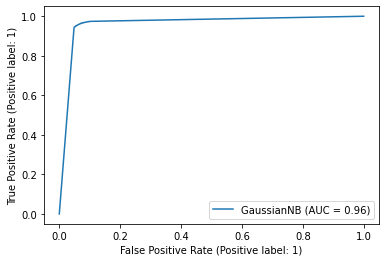

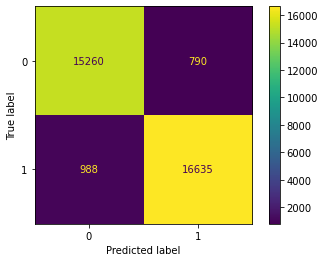


Naive Bayes on Testing Data
	Accuracy: 0.9408463251670378
	Error: 0.05915367483296219
	Precision: 0.94377990430622
	Recall: 0.9428132468419256
	F1 score: 0.9432963279248505


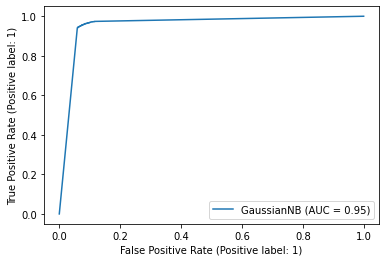

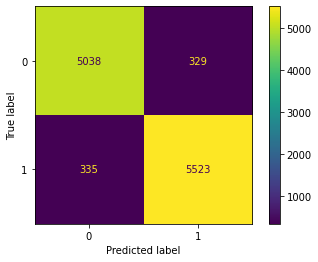

In [24]:
from sklearn.naive_bayes import GaussianNB

# NB model object 
model = GaussianNB()

# training the NB model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nNaive Bayes on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nNaive Bayes on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### KNN Model

In [21]:
# imports for KNN and CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Cross Validation for KNN 
k_values = [2, 4, 6, 8, 10, 20, 30]
best_score = float("-inf")
best_k = -1
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Show CV error for each value of k
    print("k: ", k)
    print("\tCross Validation Score: ", score)
    print("\n")

    if score > best_score:
        best_k = k
        best_score = score

k:  2
	Cross Validation Score:  0.7983844815470651


k:  4
	Cross Validation Score:  0.8365459813566718


k:  6
	Cross Validation Score:  0.8599472631543901


k:  8
	Cross Validation Score:  0.8709352113806457


k:  10
	Cross Validation Score:  0.8799928913960094


k:  20
	Cross Validation Score:  0.8949306613449153


k:  30
	Cross Validation Score:  0.8998604958515871





KNN on Training Data
	Accuracy: 0.9102545065779705
	Error: 0.08974549342202953
	Precision: 0.9460499786155068
	Recall: 0.8786245247687681
	F1 score: 0.9110914974992645


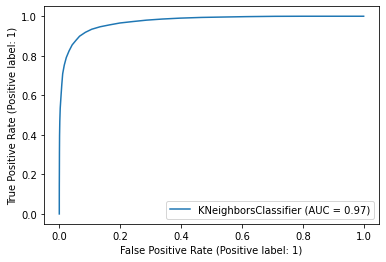

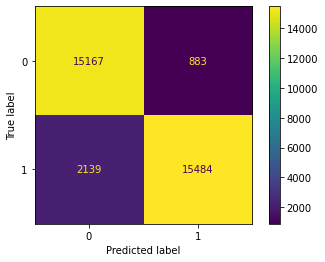


KNN on Testing Data
	Accuracy: 0.9028062360801782
	Error: 0.09719376391982182
	Precision: 0.943606923506421
	Recall: 0.8654831000341413
	F1 score: 0.9028581604487579


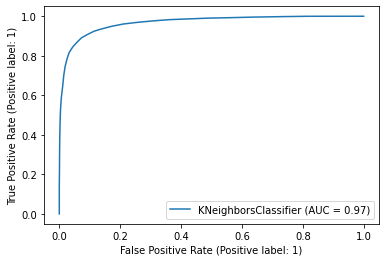

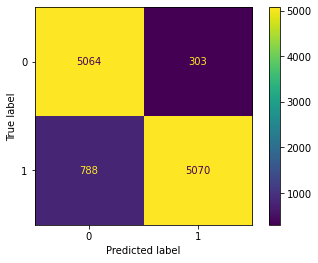

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model object 
model = KNeighborsClassifier(n_neighbors = 30)

# training the KNN model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nKNN on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nKNN on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### Logistic Regression Model


Logistic Regression on Training Data
	Accuracy: 0.9939714311169185
	Error: 0.006028568883081453
	Precision: 0.995336669699727
	Recall: 0.9931339726493786
	F1 score: 0.9942341011730621


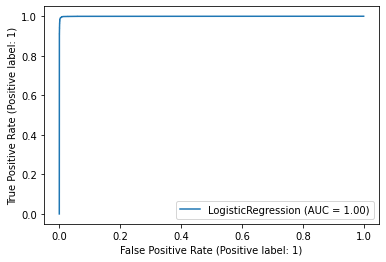

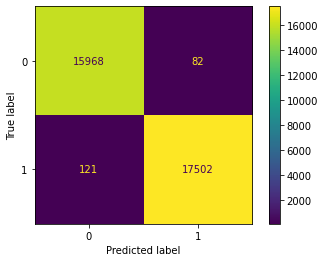


Logistic Regression on Testing Data
	Accuracy: 0.987706013363029
	Error: 0.01229398663697101
	Precision: 0.9898937992463173
	Recall: 0.9865141686582451
	F1 score: 0.9882010943912449


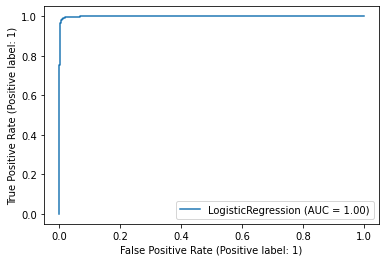

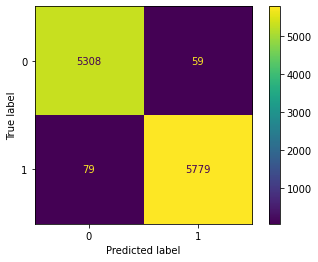

In [25]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model object 
model = LogisticRegression(random_state=0)

# training the NB model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nLogistic Regression on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nLogistic Regression on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### Decision Tree Model (using gini index) 


Decision Tree (Gini Index) on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


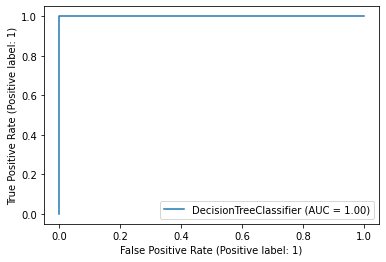

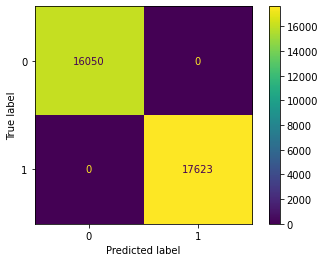


Decision Tree (Gini Index) on Testing Data
	Accuracy: 0.9648106904231626
	Error: 0.03518930957683741
	Precision: 0.9599259134534434
	Recall: 0.9731990440423353
	F1 score: 0.966516911079088


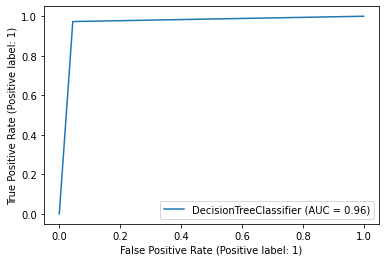

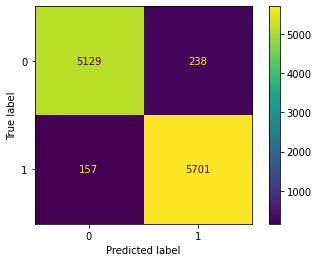

In [27]:
from sklearn.tree import DecisionTreeClassifier

# DT model object 
model = DecisionTreeClassifier(random_state=0)

# training the DT model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nDecision Tree (Gini Index) on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nDecision Tree (Gini Index) on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)


### Decision Tree Model (using IG) 


Decision Tree (IG) on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


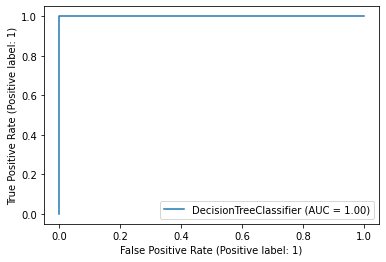

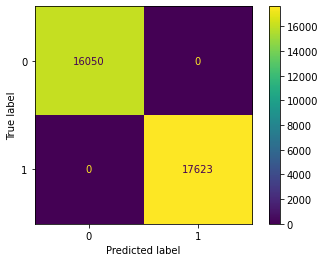


Decision Tree (IG) on Testing Data
	Accuracy: 0.9644543429844098
	Error: 0.035545657015590204
	Precision: 0.9622353937341236
	Recall: 0.9699556162512804
	F1 score: 0.9660800816118337


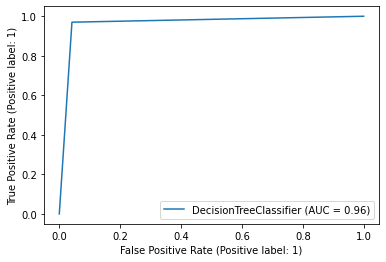

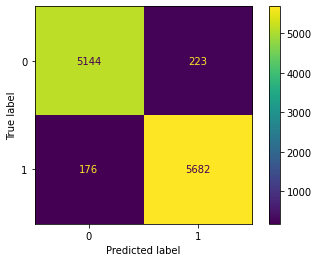

In [28]:
from sklearn.tree import DecisionTreeClassifier

# DT model object 
model = DecisionTreeClassifier(criterion = "entropy", random_state=0)

# training the DT model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nDecision Tree (IG) on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nDecision Tree (IG) on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)


### Random Forest Model (Bagging)


Random Forest on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


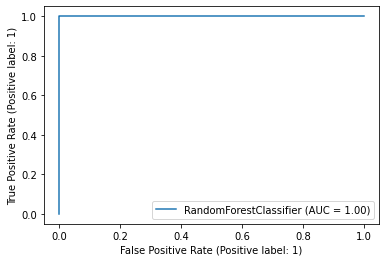

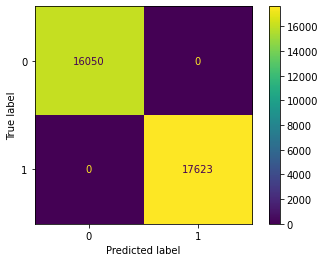


Random Forest on Testing Data
	Accuracy: 0.9892204899777283
	Error: 0.010779510022271732
	Precision: 0.9909293171316105
	Recall: 0.9883919426425402
	F1 score: 0.989659003503974


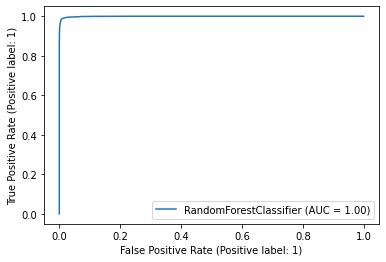

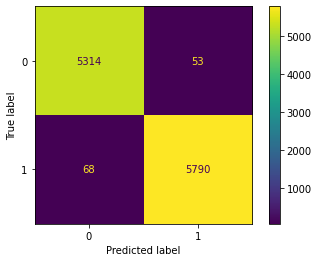

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model object 
model = RandomForestClassifier(criterion="gini", random_state=5)

# training the Random Forest model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nRandom Forest on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nRandom Forest on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

In [39]:
# creating a dataframe for feature importance values
fi_df = pd.DataFrame()

# getting a list of feature importance values
feature_importance = list(model.feature_importances_)

# list of feature names 
feature_names = list(model.feature_names_in_)

# adding to dataframe 
fi_df["feature"] = feature_names
fi_df["importance"] = feature_importance


# sorting features by feature importance
fi_df = fi_df.sort_values(by="importance", ascending=False)

# top 30 most important features
fi_df.iloc[:30]

,feature,importance
3576,text: said,0.065855
1902,title: video,0.045979
3904,text: via,0.038519
2683,text: featured,0.029394
2872,text: image,0.025109
3939,text: washington,0.013883
2399,text: com,0.012240
3146,text: minister,0.010556
3456,text: read,0.010407
3045,text: like,0.010051


### AdaBoost Model


AdaBoost on Training Data
	Accuracy: 0.9847058474148428
	Error: 0.015294152585157206
	Precision: 0.9882420091324201
	Recall: 0.9824660954434545
	F1 score: 0.9853455880260649


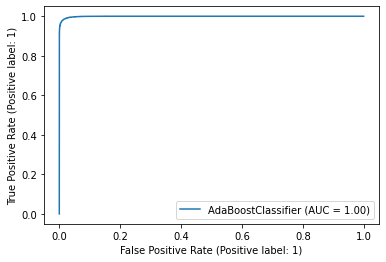

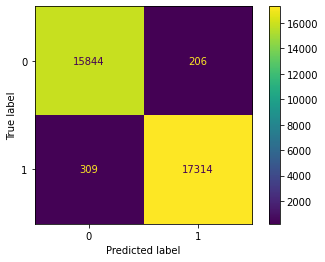


AdaBoost on Testing Data
	Accuracy: 0.9794209354120267
	Error: 0.020579064587973317
	Precision: 0.982672842683136
	Recall: 0.9778081256401502
	F1 score: 0.9802344485325575


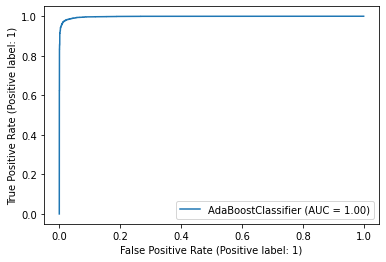

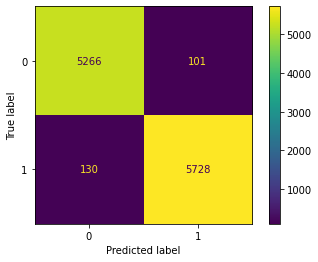

In [41]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost model object 
model = AdaBoostClassifier(n_estimators= 100, random_state=0)

# training the AdaBoost model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nAdaBoost on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nAdaBoost on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### MLP Classifier Model


MLP Classifier on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


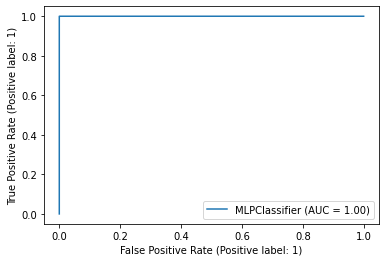

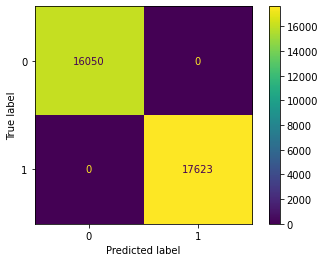


MLP Classifier on Testing Data
	Accuracy: 0.9910913140311804
	Error: 0.008908685968819552
	Precision: 0.991296928327645
	Recall: 0.9916353704335951
	F1 score: 0.9914661204983786


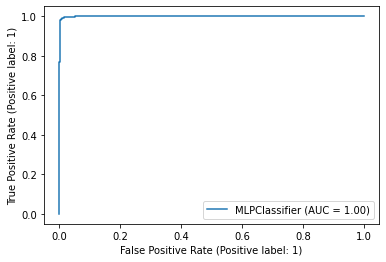

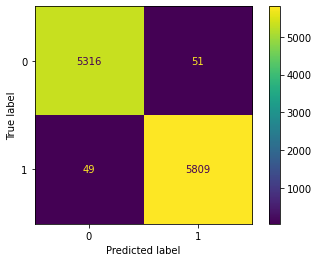

In [42]:
from sklearn.neural_network import MLPClassifier

# MLP Classifier model object 
model = MLPClassifier(random_state=0)

# training the MLP Classifier model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nMLP Classifier on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nMLP Classifier on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)